In [8]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import sys

sys.path.append("..")

import GanUtils as utils
import GaussianMixtureUtils as GMutils

sys.path.append("../DiscriminativeNN")

import DiscGaussianMixture5Layers as disc

sys.path.append("../GenerativeNN")

import GenGaussianMixture5Layers as gen

manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

%matplotlib inline

Random Seed:  1286


In [10]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 5 # Training more the discriminator

c = 0.01 # clip

In [11]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [12]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [13]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

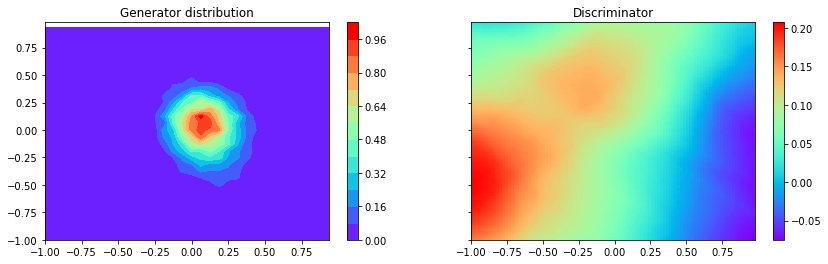

[1/100][999/1000] Loss_D: -0.00053914 Loss_G: -0.0095 D(G(z)): 0.0095


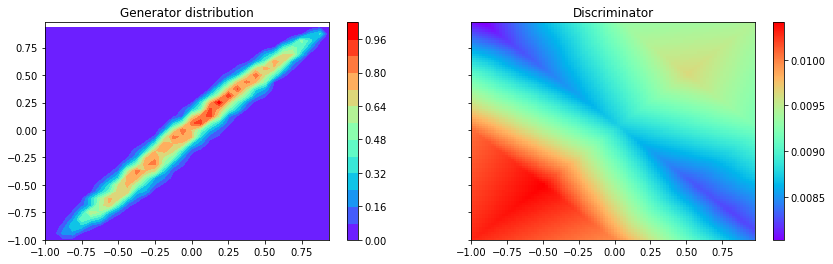

[2/100][999/1000] Loss_D: -0.00031901 Loss_G: -0.0093 D(G(z)): 0.0093


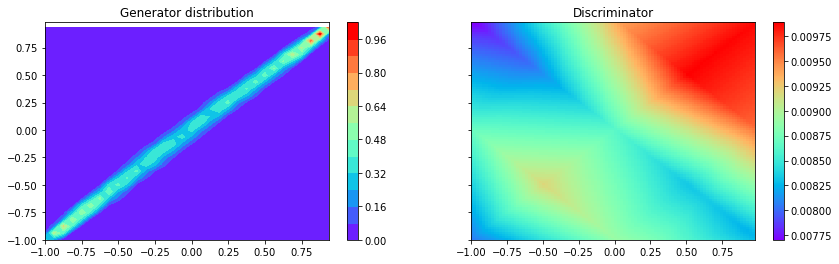

[3/100][999/1000] Loss_D: -0.00033069 Loss_G: -0.0091 D(G(z)): 0.0091


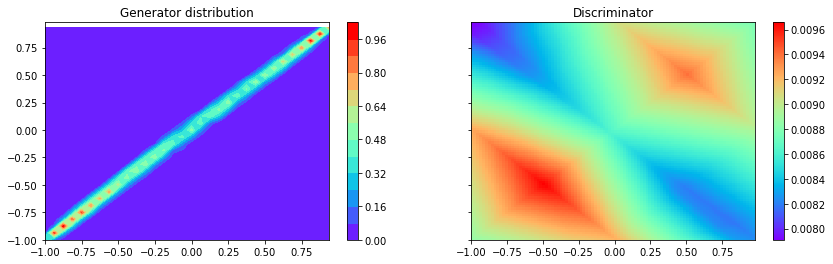

[4/100][999/1000] Loss_D: -0.00049848 Loss_G: -0.0090 D(G(z)): 0.0090


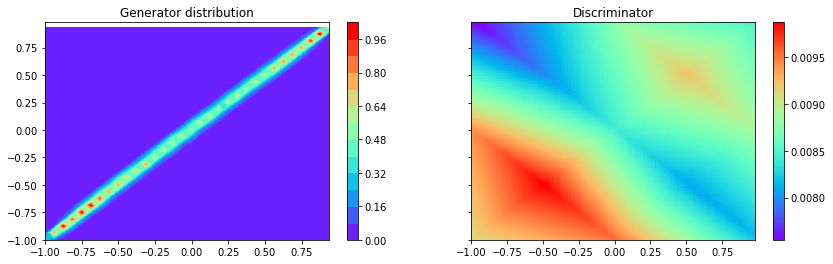

[5/100][999/1000] Loss_D: -0.00050418 Loss_G: -0.0091 D(G(z)): 0.0091


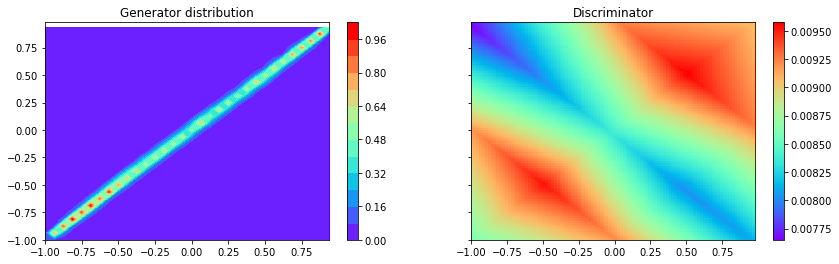

[6/100][999/1000] Loss_D: -0.00058221 Loss_G: -0.0082 D(G(z)): 0.0082


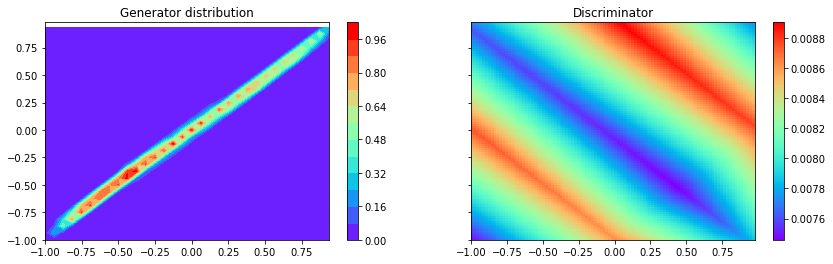

[7/100][999/1000] Loss_D: -0.00051252 Loss_G: -0.0082 D(G(z)): 0.0082


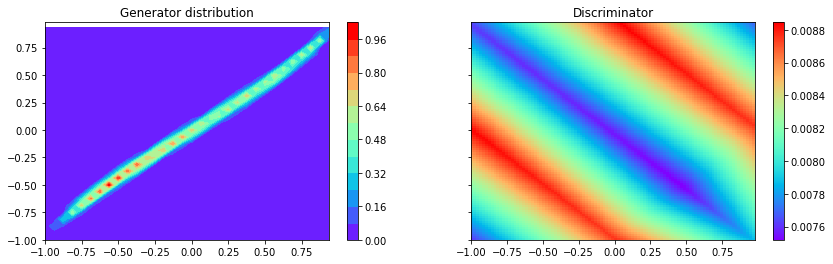

[8/100][999/1000] Loss_D: -0.00047675 Loss_G: -0.0082 D(G(z)): 0.0082


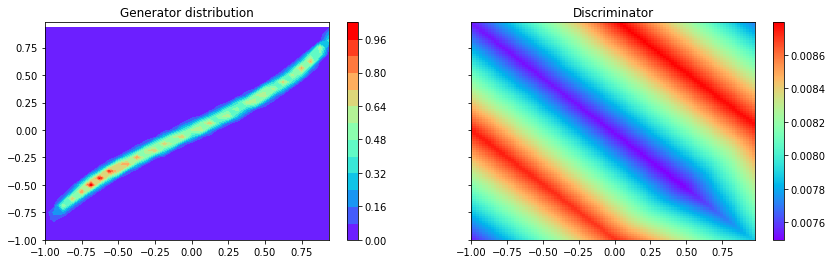

[9/100][999/1000] Loss_D: -0.00054773 Loss_G: -0.0084 D(G(z)): 0.0084


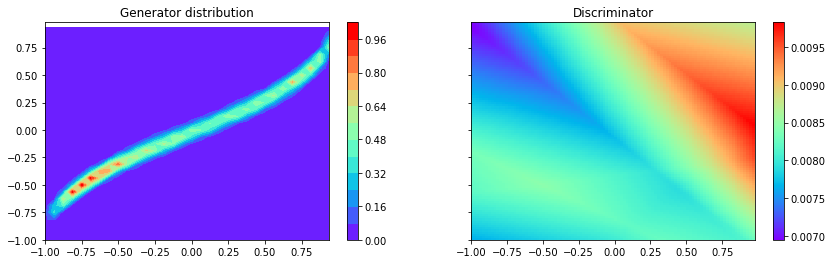

[10/100][999/1000] Loss_D: -0.00046823 Loss_G: -0.0075 D(G(z)): 0.0075


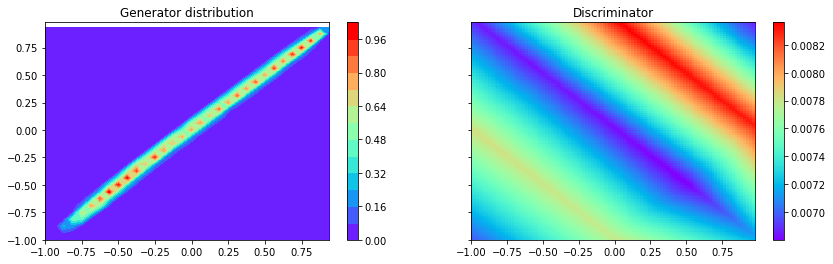

[11/100][999/1000] Loss_D: -0.00064221 Loss_G: -0.0075 D(G(z)): 0.0075


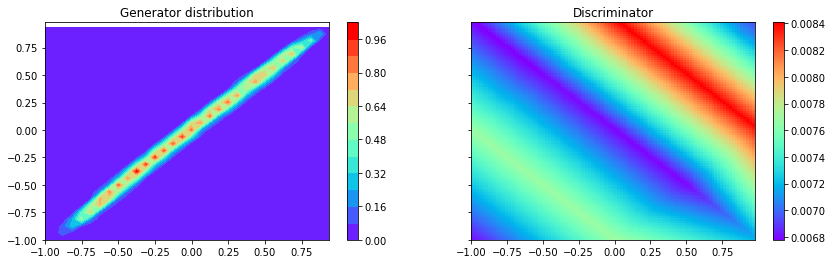

[12/100][999/1000] Loss_D: -0.00050132 Loss_G: -0.0075 D(G(z)): 0.0075


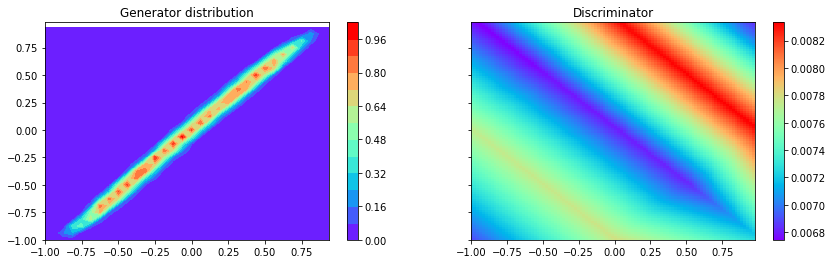

[13/100][999/1000] Loss_D: -0.00040871 Loss_G: -0.0076 D(G(z)): 0.0076


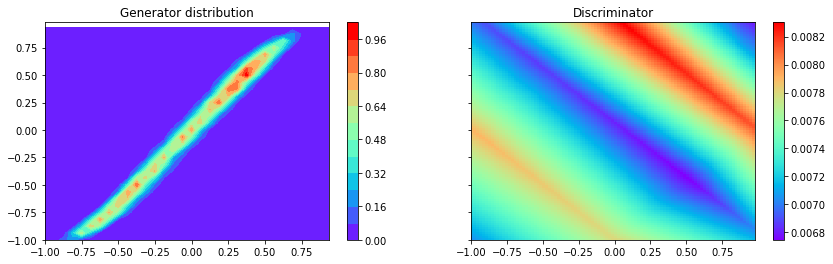

[14/100][999/1000] Loss_D: -0.00038315 Loss_G: -0.0078 D(G(z)): 0.0078


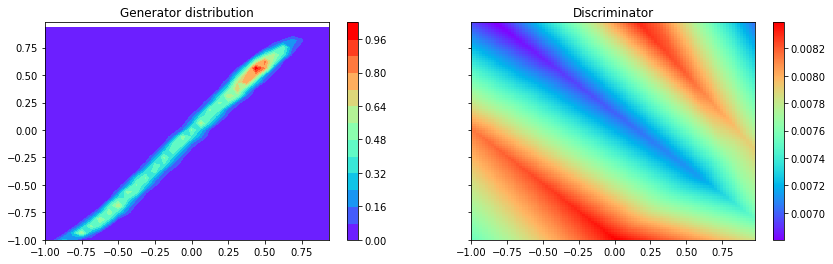

[15/100][999/1000] Loss_D: -0.00047263 Loss_G: -0.0076 D(G(z)): 0.0076


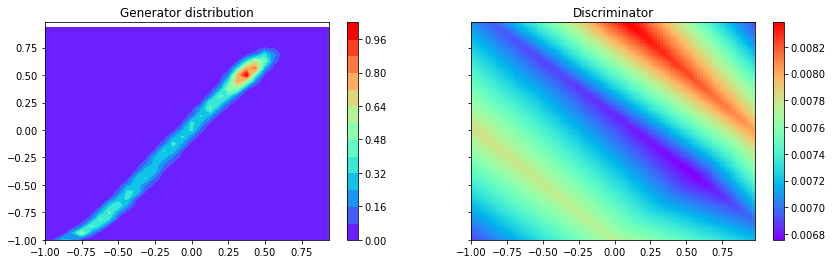

[16/100][999/1000] Loss_D: -0.00034927 Loss_G: -0.0075 D(G(z)): 0.0075


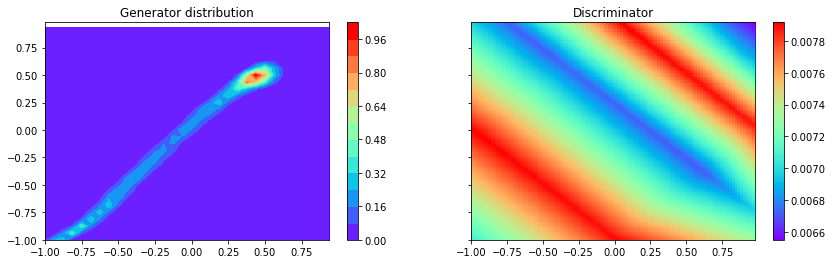

[17/100][999/1000] Loss_D: -0.00032118 Loss_G: -0.0076 D(G(z)): 0.0076


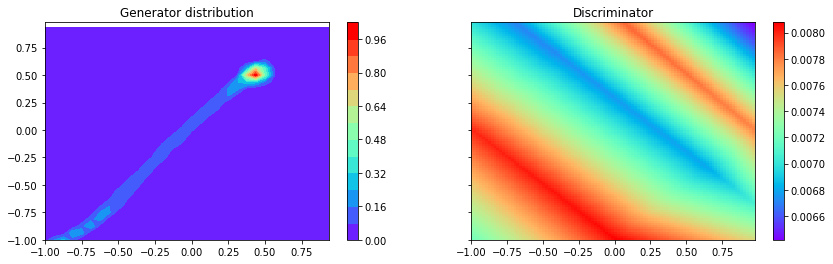

[18/100][999/1000] Loss_D: -0.00040039 Loss_G: -0.0076 D(G(z)): 0.0076


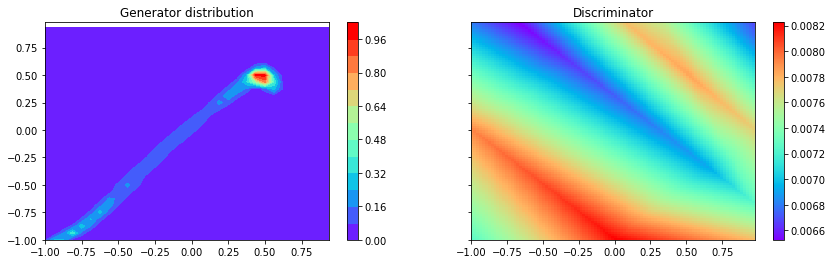

[19/100][999/1000] Loss_D: -0.00032048 Loss_G: -0.0077 D(G(z)): 0.0077


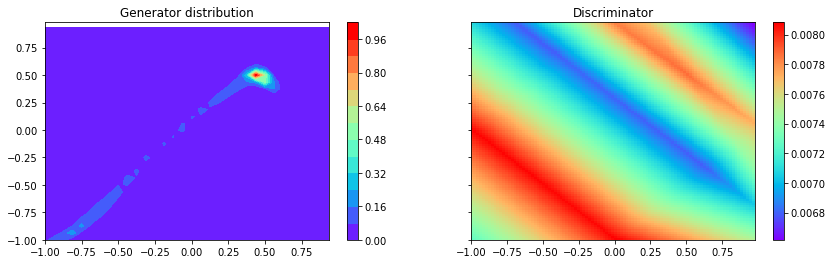

[20/100][999/1000] Loss_D: -0.00035298 Loss_G: -0.0079 D(G(z)): 0.0079


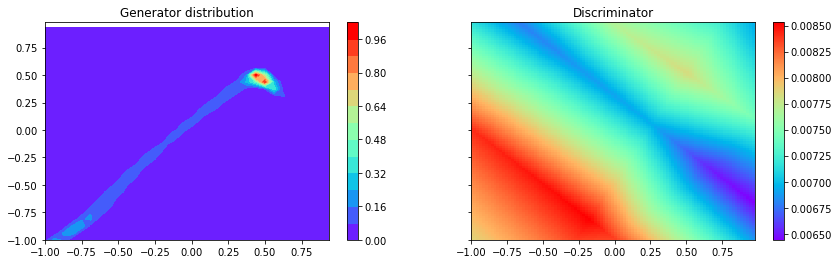

[21/100][999/1000] Loss_D: -0.00032808 Loss_G: -0.0078 D(G(z)): 0.0078


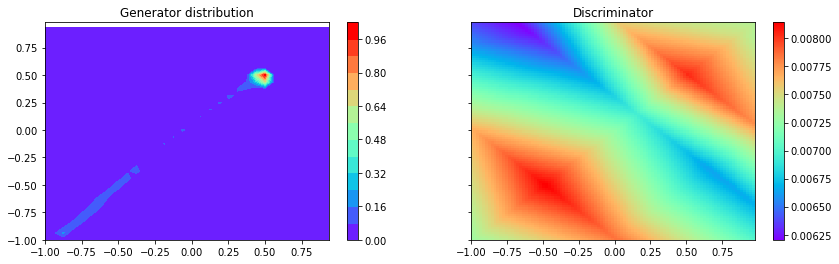

[22/100][999/1000] Loss_D: -0.00075131 Loss_G: -0.0062 D(G(z)): 0.0062


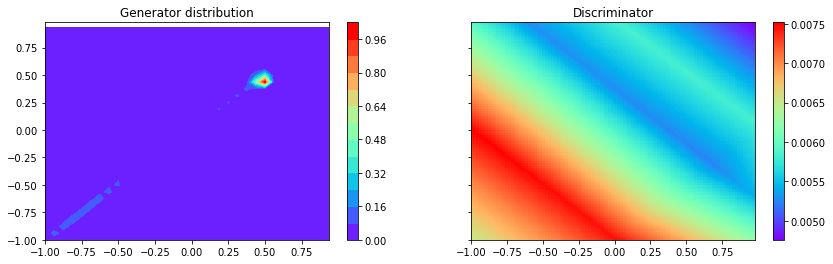

[23/100][999/1000] Loss_D: -0.00031748 Loss_G: -0.0063 D(G(z)): 0.0063


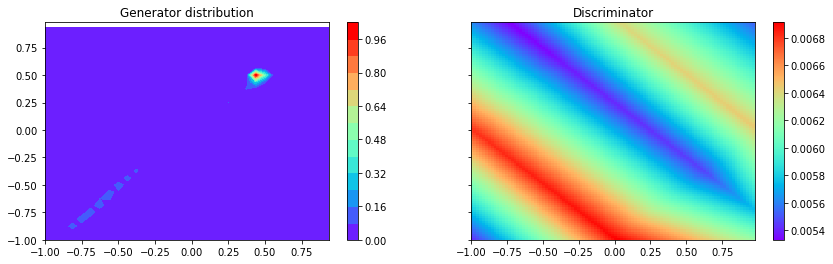

[24/100][999/1000] Loss_D: -0.00024765 Loss_G: -0.0067 D(G(z)): 0.0067


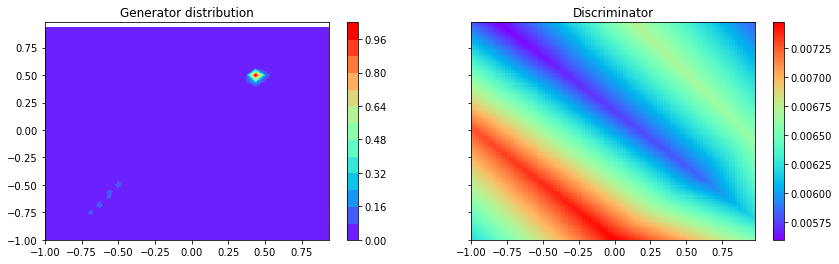

[25/100][999/1000] Loss_D: -0.00023955 Loss_G: -0.0068 D(G(z)): 0.0068


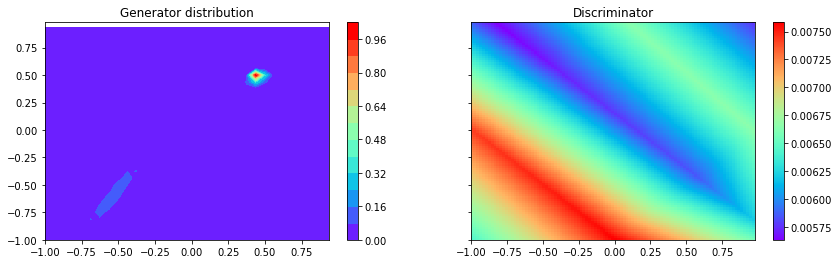

[26/100][999/1000] Loss_D: -0.00040984 Loss_G: -0.0068 D(G(z)): 0.0068


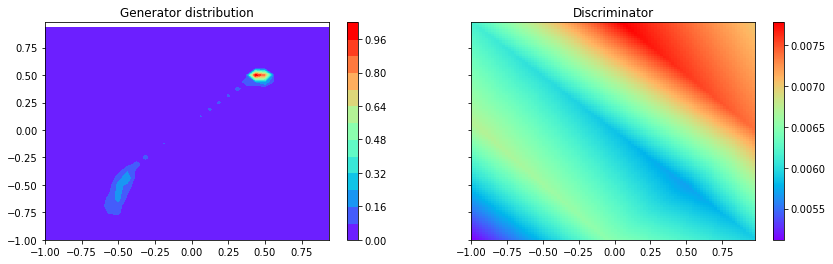

[27/100][999/1000] Loss_D: -0.00045133 Loss_G: -0.0066 D(G(z)): 0.0066


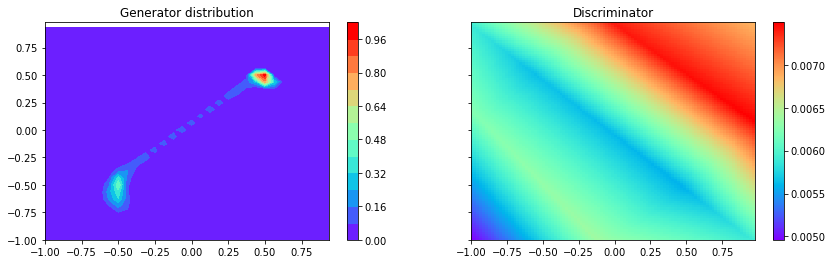

[28/100][999/1000] Loss_D: -0.00015285 Loss_G: -0.0069 D(G(z)): 0.0069


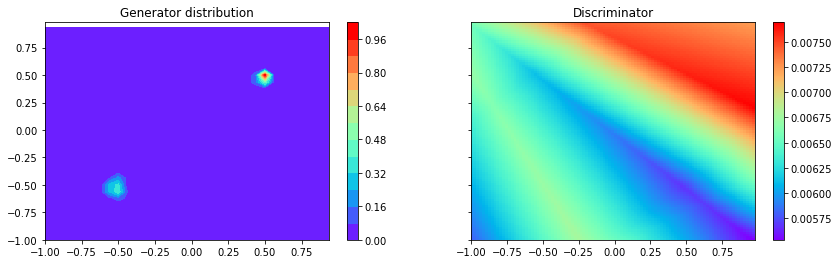

[29/100][999/1000] Loss_D: -0.00034533 Loss_G: -0.0064 D(G(z)): 0.0064


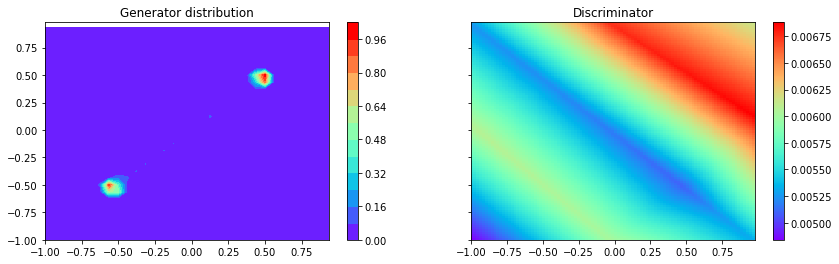

[30/100][999/1000] Loss_D: -0.00010509 Loss_G: -0.0060 D(G(z)): 0.0060


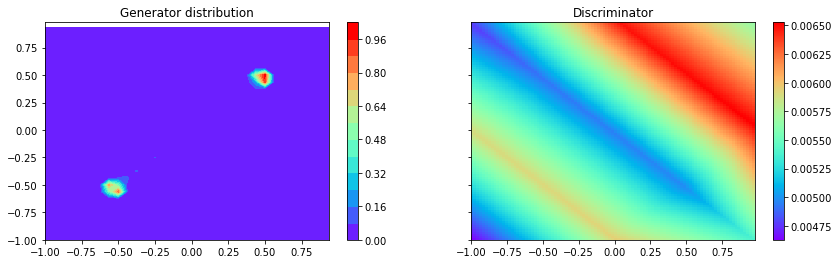

[31/100][999/1000] Loss_D: -0.00016776 Loss_G: -0.0063 D(G(z)): 0.0063


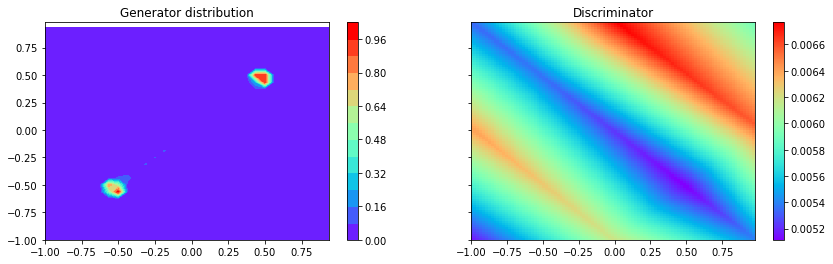

[32/100][999/1000] Loss_D: -0.00021901 Loss_G: -0.0062 D(G(z)): 0.0062


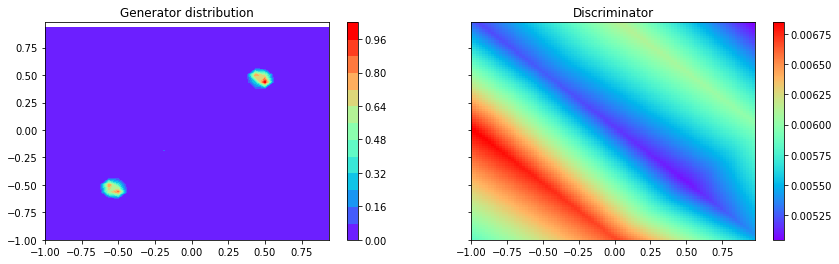

[33/100][999/1000] Loss_D: -0.00012394 Loss_G: -0.0065 D(G(z)): 0.0065


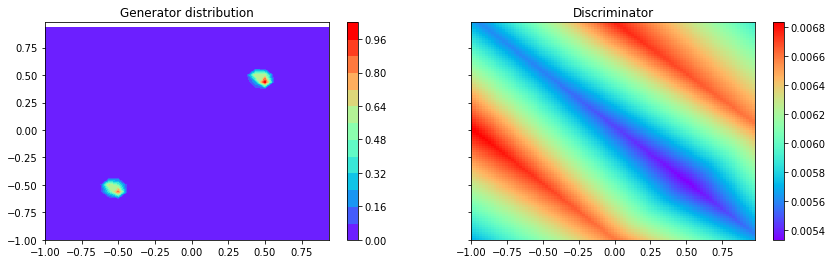

[34/100][999/1000] Loss_D: -0.00016396 Loss_G: -0.0065 D(G(z)): 0.0065


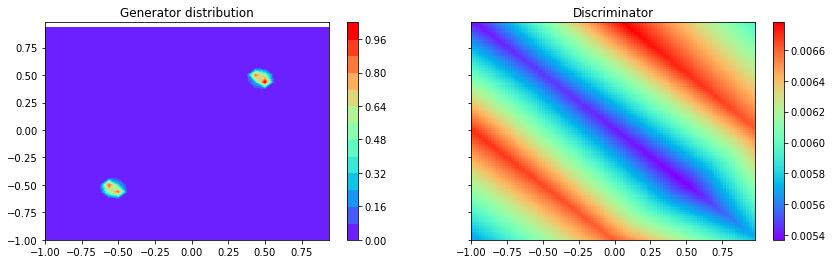

[35/100][999/1000] Loss_D: -0.00016332 Loss_G: -0.0067 D(G(z)): 0.0067


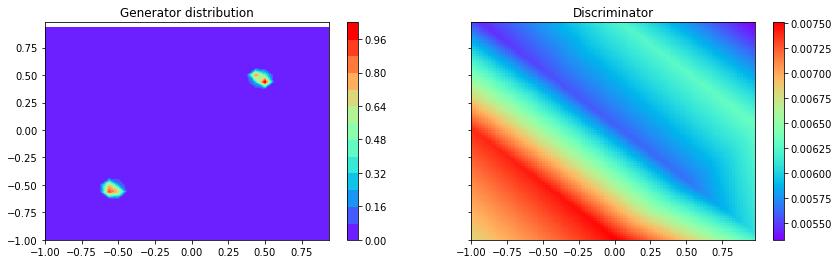

[36/100][999/1000] Loss_D: -0.00011041 Loss_G: -0.0069 D(G(z)): 0.0069


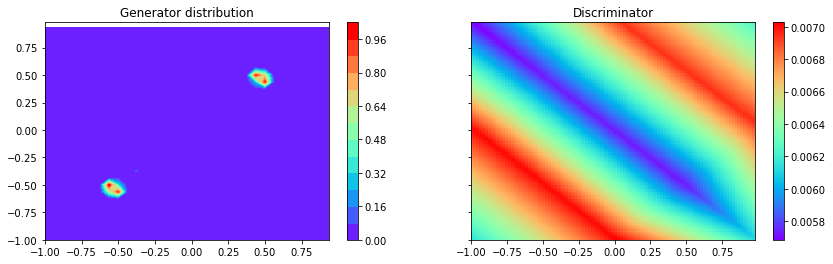

[37/100][999/1000] Loss_D: -0.00017284 Loss_G: -0.0068 D(G(z)): 0.0068


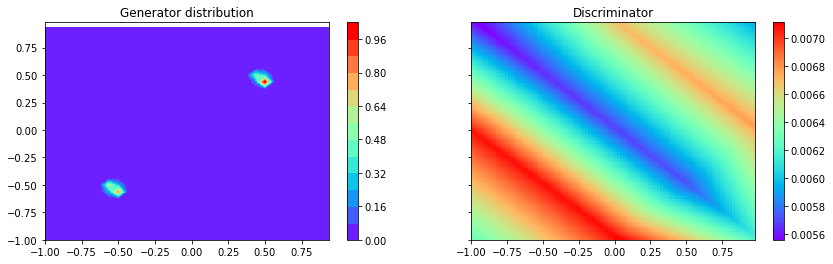

[38/100][999/1000] Loss_D: -0.00007532 Loss_G: -0.0067 D(G(z)): 0.0067


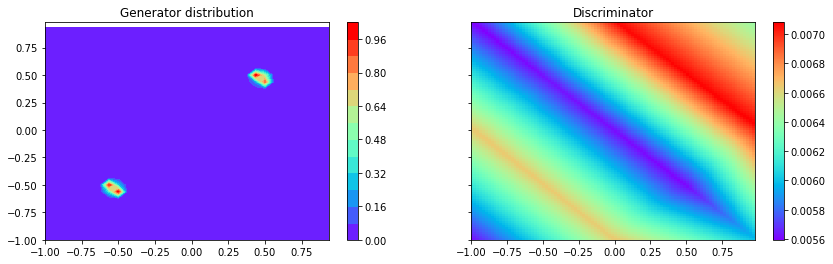

[39/100][999/1000] Loss_D: -0.00018457 Loss_G: -0.0069 D(G(z)): 0.0069


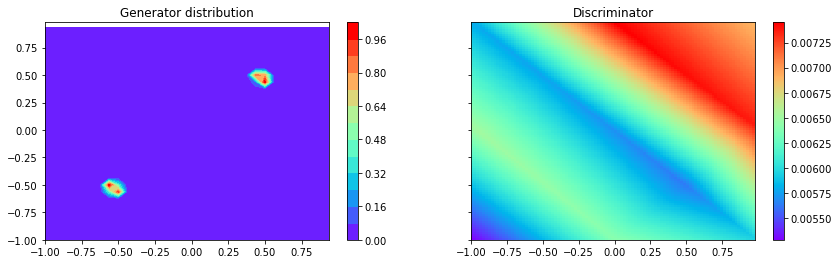

[40/100][999/1000] Loss_D: -0.00010562 Loss_G: -0.0068 D(G(z)): 0.0068


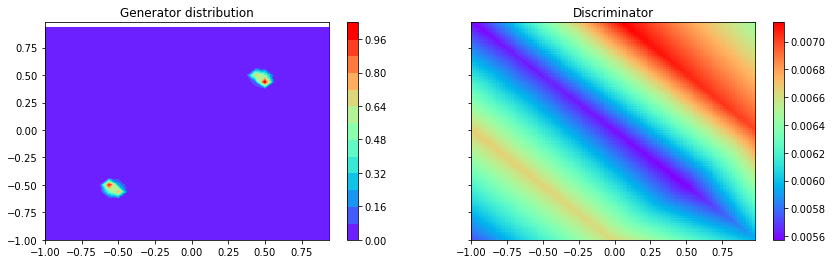

[41/100][999/1000] Loss_D: -0.00026505 Loss_G: -0.0065 D(G(z)): 0.0065


KeyboardInterrupt: 

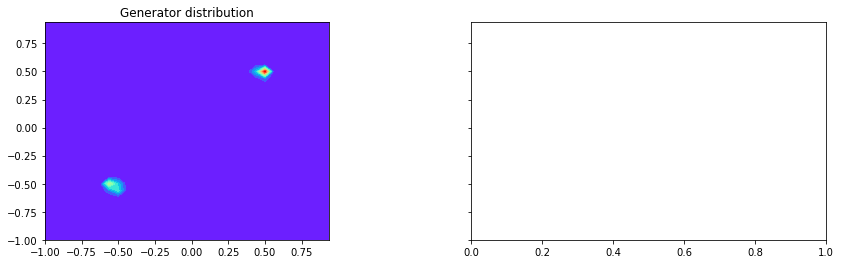

In [14]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.clamp_(-c, c)

        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)